# Train with Whole Labeled

## Set up

In [1]:
import os
from pathlib import Path
import pickle
PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))
from backend.utils.models.tabular_data import get_trained_best_model
from backend.utils.models.timeline_data import get_trained_gru_model
from backend.utils.comparing import plot_confusion_matrix

2025-08-01 09:01:23.818676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
MODEL_PATH = os.path.join(PATH, 'backend/models')

## Bytecode Model

In [3]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'hex'), MODEL_PATH, test_size=0, mode='byte', n_trials=100)

[I 2025-07-31 23:21:54,598] A new study created in memory with name: no-name-d6dccc76-71bf-43bb-a64b-454f23c72071
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29
[I 2025-07-31 23:24:14,309] Trial 0 finished with value: 0.446185912852579

✅ Best Params: {'model': 'ExtraTrees', 'n_estimators': 70, 'max_depth': 29, 'n_max_features': 18484, 'n_min_df': 4}
🥇 Best Score: 0.5187249680003302


invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29


✅ Model saved byte.pkl


In [4]:
df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,calldatacopy push1 dup1,dup1 calldatasize push1,calldatasize push1 dup5,push1 dup5 gas,dup5 gas delegatecall,delegatecall returndatasize push1,jumpdest returndatasize push1,returndatasize push1 return,iszero eq push2,push1 dup1 dup8
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,0,0
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,0,0,0,0,0,1,1,0,0,0
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,0,1,1,0,0,0,0,0,0,0
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,0,0,0,0,0,0,0,0,0,0
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,0,0,0,0,0,0,0,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x8275ebf521dc217aa79c88132017a5bcef001dd9 to 0x17e65e6b9b166fb8e7c59432f0db126711246bc0
Columns: 4649 entries, opcode_entropy to push1 dup1 dup8
dtypes: float64(259), int64(4390)
memory usage: 2.4+ MB


In [6]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

        Mint       1.00      0.95      0.97        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       1.00      0.98      0.99        59
   macro avg       1.00      0.98      0.99        59
weighted avg       1.00      0.98      0.99        59
 samples avg       0.61      0.60      0.60        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

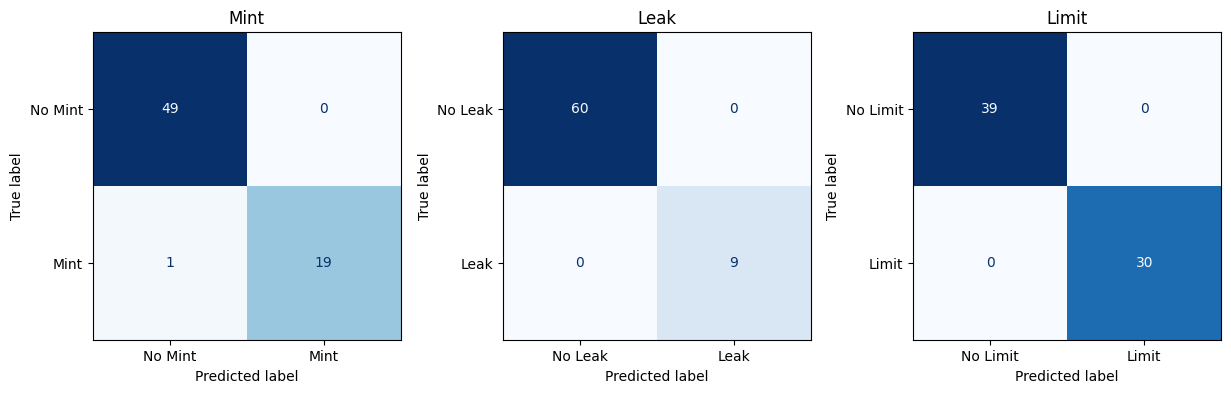

In [7]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [8]:
byte = pickle.load(open(os.path.join(MODEL_PATH, 'byte.pkl'), 'rb'))

In [9]:
byte['model']

MultiOutputClassifier(estimator=ExtraTreesClassifier(max_depth=29,
                                                     n_estimators=70,
                                                     random_state=42))

In [10]:
byte['weights']

array([0.97435897, 1.        , 1.        ])

In [11]:
byte['feature_cols']

['opcode_entropy',
 'byte_entropy',
 'byte_0x',
 'byte_60',
 'byte_80',
 'byte_40',
 'byte_52',
 'byte_04',
 'byte_36',
 'byte_10',
 'byte_61',
 'byte_00',
 'byte_db',
 'byte_57',
 'byte_35',
 'byte_7c',
 'byte_01',
 'byte_90',
 'byte_63',
 'byte_ff',
 'byte_16',
 'byte_06',
 'byte_fd',
 'byte_de',
 'byte_03',
 'byte_14',
 'byte_e0',
 'byte_09',
 'byte_5e',
 'byte_a7',
 'byte_b3',
 'byte_70',
 'byte_18',
 'byte_0d',
 'byte_dd',
 'byte_d5',
 'byte_23',
 'byte_b8',
 'byte_72',
 'byte_02',
 'byte_31',
 'byte_3c',
 'byte_e5',
 'byte_67',
 'byte_85',
 'byte_42',
 'byte_96',
 'byte_6c',
 'byte_68',
 'byte_b6',
 'byte_66',
 'byte_84',
 'byte_e3',
 'byte_a0',
 'byte_82',
 'byte_48',
 'byte_71',
 'byte_50',
 'byte_a6',
 'byte_9f',
 'byte_8d',
 'byte_a5',
 'byte_cb',
 'byte_5b',
 'byte_95',
 'byte_d8',
 'byte_9b',
 'byte_41',
 'byte_a9',
 'byte_05',
 'byte_9c',
 'byte_bb',
 'byte_9d',
 'byte_d7',
 'byte_3d',
 'byte_d6',
 'byte_62',
 'byte_ed',
 'byte_3e',
 'byte_f2',
 'byte_8b',
 'byte_34',
 'by

In [12]:
byte['vectorizer']

CountVectorizer(max_features=18484, min_df=4, ngram_range=(1, 3))

In [13]:
y_pred = byte['model'].predict(X_test)

              precision    recall  f1-score   support

        Mint       1.00      0.95      0.97        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       1.00      0.98      0.99        59
   macro avg       1.00      0.98      0.99        59
weighted avg       1.00      0.98      0.99        59
 samples avg       0.61      0.60      0.60        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

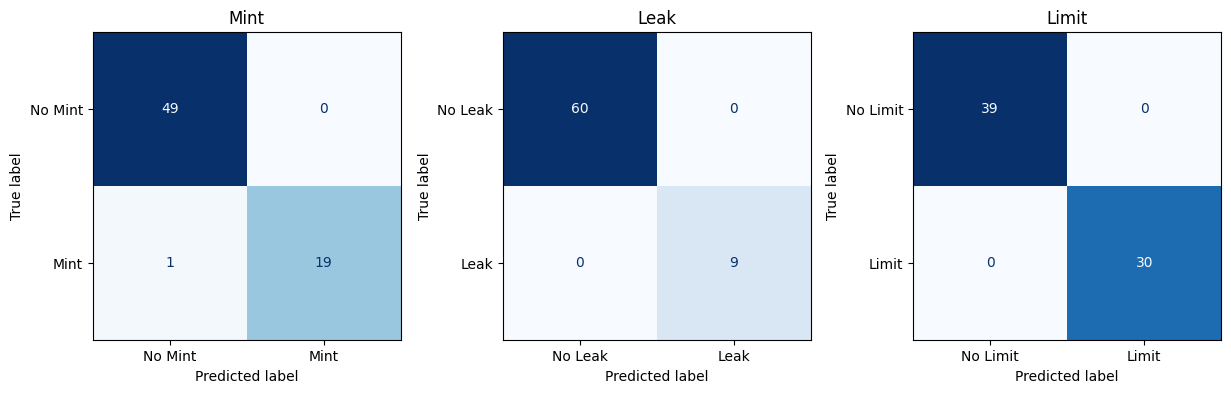

In [14]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Source Code Model

In [16]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'sol'), MODEL_PATH, test_size=0, mode='code', n_trials=100)

[I 2025-08-01 00:19:00,468] A new study created in memory with name: no-name-4b97bddd-d635-4edd-8484-c31a40705a7a
[I 2025-08-01 00:19:03,519] Trial 0 finished with value: 0.36178155827278635 and parameters: {'model': 'RandomForest', 'n_estimators': 193, 'max_depth': 26, 'n_max_features': 4555, 'n_min_df': 3}. Best is trial 0 with value: 0.36178155827278635.
[I 2025-08-01 00:19:06,099] Trial 1 finished with value: 0.29546674474210705 and parameters: {'model': 'MLP', 'hidden_layer_sizes': '100_50', 'activation': 'tanh', 'learning_rate_init': 0.07131526054033016, 'n_max_features': 9841, 'n_min_df': 2}. Best is trial 0 with value: 0.36178155827278635.
[I 2025-08-01 00:19:15,341] Trial 2 finished with value: 0.536279769613103 and parameters: {'model': 'MLP', 'hidden_layer_sizes': '50_50', 'activation': 'tanh', 'learning_rate_init': 0.05779702959531021, 'n_max_features': 18914, 'n_min_df': 1}. Best is trial 2 with value: 0.536279769613103.
[I 2025-08-01 00:19:16,037] Trial 3 finished with va

✅ Best Params: {'model': 'LogisticRegression', 'C': 7.824410893208569, 'n_max_features': 18346, 'n_min_df': 1}
🥇 Best Score: 0.6402652860318764
✅ Model saved code.pkl


In [17]:
df.head()

,spdx,license,identifier,mit,pragma,solidity,0,6,12,import,...,setmaster,syncpair,rewardholders,_issuper,_getethequivalent,bought,sold,soldeth,_hasliquidity,amounttokens
Address,,,,,,,,,,,,,,,,,,,,,
0xa0ffc741f109159ee203424a299e6d2731dcfc76,0.159041,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1,0.083292,0.011524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,0.088255,0.030340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xe4182e57eeb29fbc2b3469e45c9e385cea8995ab,0.088522,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x108d0f1fc10ed324f8cc65d0a91cad11cd4994a4,0.118818,0.007929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0xa0ffc741f109159ee203424a299e6d2731dcfc76 to 0x8b2e68075a06959e3e35aa0e451a13e099e41b23
Columns: 5417 entries, spdx to amounttokens
dtypes: float64(5417)
memory usage: 2.8+ MB


In [19]:
y_pred = model.predict(X_test)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

              precision    recall  f1-score   support

        Mint       0.83      1.00      0.91        20
        Leak       1.00      1.00      1.00         9
       Limit       0.90      0.90      0.90        30

   micro avg       0.89      0.95      0.92        59
   macro avg       0.91      0.97      0.94        59
weighted avg       0.89      0.95      0.92        59
 samples avg       0.58      0.59      0.57        59



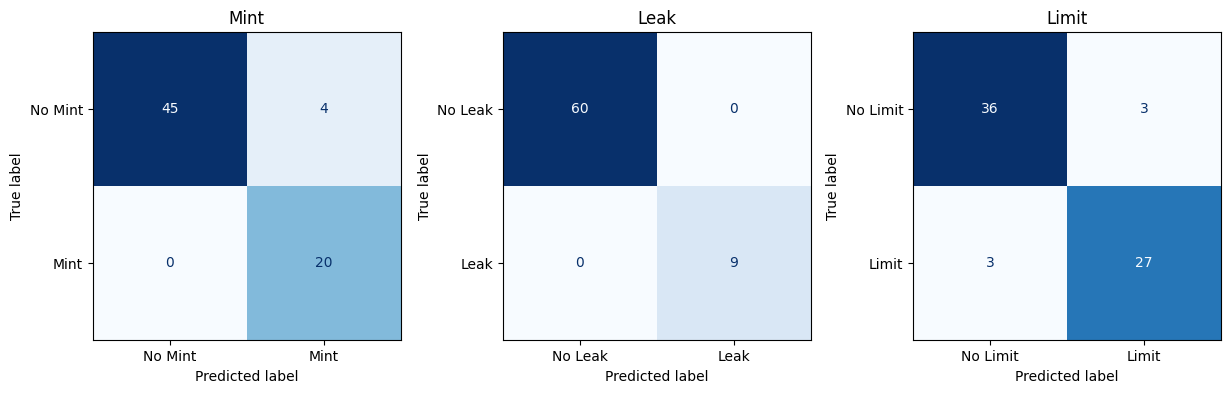

In [20]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [21]:
code = pickle.load(open(os.path.join(MODEL_PATH, 'code.pkl'), 'rb'))

In [22]:
code['model']

MultiOutputClassifier(estimator=LogisticRegression(C=7.824410893208569,
                                                   class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear'))

In [23]:
code['weights']

array([0.90909091, 1.        , 0.9       ])

In [24]:
code['feature_cols']

['spdx',
 'license',
 'identifier',
 'mit',
 'pragma',
 'solidity',
 '0',
 '6',
 '12',
 'import',
 'interfaces',
 'imasterchef',
 'sol',
 'basemissionlpsingle',
 'contract',
 'missionmasterchef',
 'is',
 'using',
 'safemath',
 'for',
 'uint256',
 'safeerc20',
 'ierc20',
 'address',
 'public',
 'masterchefaddress',
 'pid',
 'constructor',
 '_vaultchefaddress',
 '_masterchefaddress',
 '_unirouteraddress',
 '_pid',
 '_wantaddress',
 '_earnedaddress',
 'memory',
 '_earnedtowmaticpath',
 '_earnedtousdcpath',
 '_earnedtotoken0path',
 '_earnedtotoken1path',
 '_token0toearnedpath',
 '_token1toearnedpath',
 'govaddress',
 'msg',
 'sender',
 'vaultchefaddress',
 'unirouteraddress',
 'wantaddress',
 'token0address',
 'iunipair',
 'token0',
 'token1address',
 'token1',
 'earnedaddress',
 'earnedtowmaticpath',
 'earnedtousdcpath',
 'earnedtotoken0path',
 'earnedtotoken1path',
 'token0toearnedpath',
 'token1toearnedpath',
 'transferownership',
 '_resetallowances',
 'function',
 '_vaultdeposit',
 '_a

In [25]:
code['vectorizer']

TfidfVectorizer(max_features=18346, token_pattern='\\b\\w+\\b')

In [26]:
y_pred = code['model'].predict(X_test)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

              precision    recall  f1-score   support

        Mint       0.83      1.00      0.91        20
        Leak       1.00      1.00      1.00         9
       Limit       0.90      0.90      0.90        30

   micro avg       0.89      0.95      0.92        59
   macro avg       0.91      0.97      0.94        59
weighted avg       0.89      0.95      0.92        59
 samples avg       0.58      0.59      0.57        59



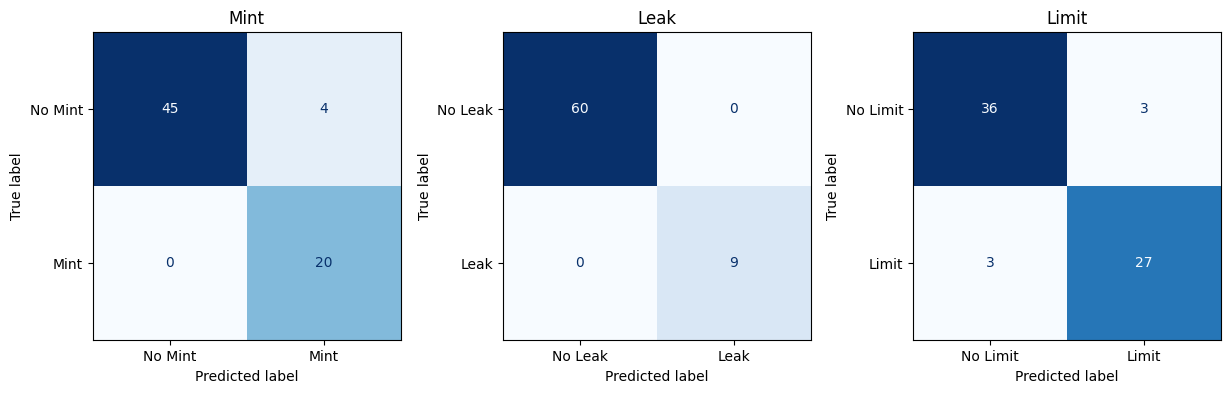

In [27]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Transaction Model

In [3]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'txn'), MODEL_PATH, n_trials=20, test_size=0, mode='txn')

[I 2025-08-01 00:42:05,278] A new study created in memory with name: no-name-0899b3d3-405b-42ea-bf99-16b72164399e
[I 2025-08-01 00:42:07,492] Trial 0 finished with value: 0.2077171799394021 and parameters: {'model': 'AdaBoost', 'n_estimators': 156, 'learning_rate': 0.12357926053850202}. Best is trial 0 with value: 0.2077171799394021.
[I 2025-08-01 00:42:07,660] Trial 1 finished with value: 0.42358690692024026 and parameters: {'model': 'DecisionTree', 'max_depth': 14}. Best is trial 1 with value: 0.42358690692024026.
[I 2025-08-01 00:42:08,254] Trial 2 finished with value: 0.26169029038594255 and parameters: {'model': 'ExtraTrees', 'n_estimators': 65, 'max_depth': 13}. Best is trial 1 with value: 0.42358690692024026.
[I 2025-08-01 00:42:08,423] Trial 3 finished with value: 0.42358690692024026 and parameters: {'model': 'DecisionTree', 'max_depth': 18}. Best is trial 1 with value: 0.42358690692024026.
[I 2025-08-01 00:42:08,752] Trial 4 finished with value: 0.23729932618821506 and paramet

✅ Best Params: {'model': 'LogisticRegression', 'C': 1.481780406401458}
🥇 Best Score: 0.43635224715684484
✅ Model saved txn.pkl


In [4]:
df.head()

,txn_nums,event_nums,creation_block,creation_timestamp,start_block,end_block,life_time,start_time,end_time,duration_seconds,...,presalemint_num,changepresalestate_num,setapprovalforall_num,safetransferfrom_num,release_num,setbaseuri_num,reveal_num,createordinaltrade_num,enableordinaltrade_num,removeordinallimit_num
Address,,,,,,,,,,,,,,,,,,,,,
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,1,2,16832271,1678870799,16832271.0,16832271.0,0.0,1.678871e+09,1.678871e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xba751bff276907c438e927d2c2f18de574195e4b,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,15,65,18559580,1699837391,18559580.0,18567687.0,8107.0,1.699837e+09,1.699935e+09,97896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x50c6ec50a89a946c5886aeb54a22fe732558f7d1 to 0x16dfb898cf7029303c2376031392cb9bac450f94
Data columns (total 98 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   txn_nums                                                69 non-null     int64  
 1   event_nums                                              69 non-null     int64  
 2   creation_block                                          69 non-null     int64  
 3   creation_timestamp                                      69 non-null     int64  
 4   start_block                                             69 non-null     float64
 5   end_block                                               69 non-null     float64
 6   life_time                                               69 non-null     float64
 7   start_time                                         

In [6]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

        Mint       0.33      0.85      0.48        20
        Leak       0.22      0.89      0.35         9
       Limit       0.51      0.83      0.63        30

   micro avg       0.36      0.85      0.51        59
   macro avg       0.35      0.86      0.49        59
weighted avg       0.41      0.85      0.54        59
 samples avg       0.29      0.51      0.36        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

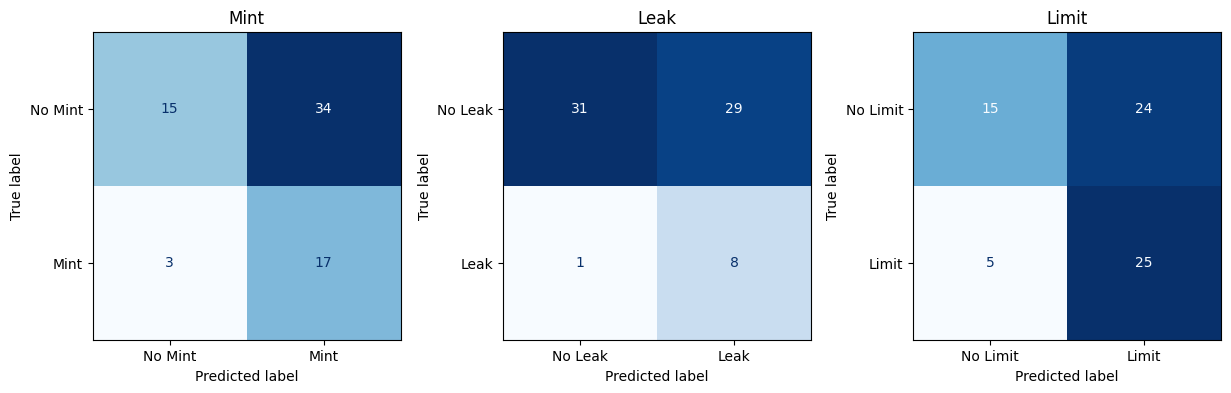

In [7]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [8]:
txn = pickle.load(open(os.path.join(MODEL_PATH, 'txn.pkl'), 'rb'))

In [9]:
txn['model']

MultiOutputClassifier(estimator=LogisticRegression(C=1.481780406401458,
                                                   class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear'))

In [10]:
txn['weights']

array([0.47887324, 0.34782609, 0.63291139])

In [11]:
txn['feature_cols']

['txn_nums',
 'event_nums',
 'creation_block',
 'creation_timestamp',
 'start_block',
 'end_block',
 'life_time',
 'start_time',
 'end_time',
 'duration_seconds',
 'from_creation_to_transfer',
 'num_addresses',
 'num_buyers',
 'num_sellers',
 'num_creator_transfers',
 'buy_amt',
 'sell_amt',
 'avg_value',
 'txn_per_block',
 'avg_gas_limit',
 'max_gas_limit',
 'min_gas_limit',
 'std_gas_limit',
 'avg_gas_used',
 'max_gas_used',
 'min_gas_used',
 'std_gas_used',
 'avg_gas_price',
 'max_gas_price',
 'min_gas_price',
 'std_gas_price',
 'ownershiptransferred_num',
 'transfer_num',
 'atinversebrah_num',
 'approval_num',
 'approve_num',
 'renounceownership_num',
 'removefee_num',
 'transferfrom_num',
 'burn_num',
 'increaseallowance_num',
 'swapexacttokensforethsupportingfeeontransfertokens_num',
 'transferownership_num',
 'opentrading_num',
 'rolegranted_num',
 'mint_num',
 'swapandliquify_num',
 'bridgemint_num',
 'setbridgeaddress_num',
 'setswapandliquifyenabled_num',
 'createstrongtrade_

In [12]:
txn['vectorizer']

{}

In [13]:
y_pred = txn['model'].predict(X_test)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

              precision    recall  f1-score   support

        Mint       0.33      0.85      0.48        20
        Leak       0.22      0.89      0.35         9
       Limit       0.51      0.83      0.63        30

   micro avg       0.36      0.85      0.51        59
   macro avg       0.35      0.86      0.49        59
weighted avg       0.41      0.85      0.54        59
 samples avg       0.29      0.51      0.36        59



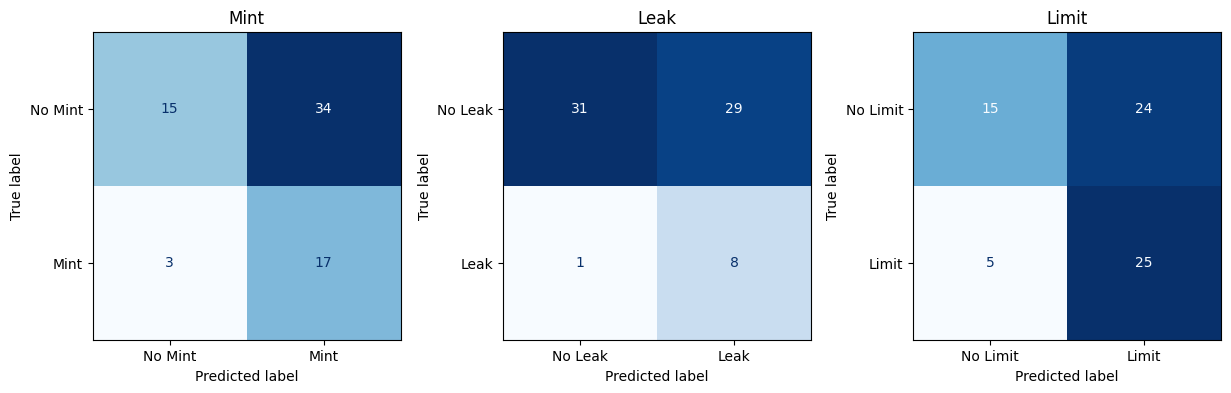

In [14]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Timeline Model

In [4]:
model, ground_df, _, X_test, _, y_test, thresholds = get_trained_gru_model(LABELED_PATH, MODEL_PATH, n_trials=20, epochs=100)

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████| 69/69 [00:01<00:00, 52.30it/s]
[I 2025-08-01 10:26:15,440] A new study created in memory with name: no-name-1e1558f2-050b-4e2e-969d-5e16a5aa0be8


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3413 - loss: 0.6920 - val_accuracy: 0.2319 - val_loss: 0.6875 - learning_rate: 1.3248e-04
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2320 - loss: 0.6872 - val_accuracy: 0.2609 - val_loss: 0.6830 - learning_rate: 1.3248e-04
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2572 - loss: 0.6828 - val_accuracy: 0.3043 - val_loss: 0.6788 - learning_rate: 1.3248e-04
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3100 - loss: 0.6783 - val_accuracy: 0.3043 - val_loss: 0.6746 - learning_rate: 1.3248e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3219 - loss: 0.6741 - val_accuracy: 0.3043 - val_loss: 0.6706 - learning_rate: 1.3248e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.2825 - loss: 0.6703 - val_accuracy: 0.3188 - val_loss: 0.6666 - learning_rate: 1.3248e-04
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3197 - loss: 0.6658 - val

[I 2025-08-01 10:36:44,068] Trial 0 finished with value: 0.35705627705627707 and parameters: {'units': 335, 'lr': 0.00013247813053225647, 'batch_size': 56}. Best is trial 0 with value: 0.35705627705627707.


Label 2: Best threshold = 0.49, Best f1 = 0.6753246753246753
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4334 - loss: 0.6829 - val_accuracy: 0.2609 - val_loss: 0.6816 - learning_rate: 2.2015e-04
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.2977 - loss: 0.6793 - val_accuracy: 0.2754 - val_loss: 0.6781 - learning_rate: 2.2015e-04
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - accuracy: 0.2627 - loss: 0.6809 - val_accuracy: 0.2754 - val_loss: 0.6746 - learning_rate: 2.2015e-04
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.2877 - loss: 0.6775 - val_accuracy: 0.2754 - val_loss: 0.6713 - learning_rate: 2.2015e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.3027 - loss: 0.6743 - val_accuracy: 0.2754 - val_loss: 0.6679 - learning_rate: 2.2015e-04
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.2627 - loss: 0.6732 - val_accuracy: 0.2754 - val_loss: 0.6646 - learning_rate: 2.2015e-04
Epoch 7/100


[I 2025-08-01 10:38:30,261] Trial 1 finished with value: 0.3757823383860437 and parameters: {'units': 75, 'lr': 0.0002201480320412558, 'batch_size': 25}. Best is trial 1 with value: 0.3757823383860437.


Label 2: Best threshold = 0.41000000000000003, Best f1 = 0.6304347826086957
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5652 - loss: 0.6930 - val_accuracy: 0.4203 - val_loss: 0.6854 - learning_rate: 4.9002e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4203 - loss: 0.6854 - val_accuracy: 0.3478 - val_loss: 0.6780 - learning_rate: 4.9002e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3478 - loss: 0.6780 - val_accuracy: 0.3043 - val_loss: 0.6710 - learning_rate: 4.9002e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3043 - loss: 0.6710 - val_accuracy: 0.2899 - val_loss: 0.6641 - learning_rate: 4.9002e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2899 - loss: 0.6641 - val_accuracy: 0.2754 - val_loss: 0.6575 - learning_rate: 4.9002e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2754 - loss: 0.6575 - val_accuracy: 0.2754 - val_loss: 0.6511 - learning_rate: 4.9002e-04
Epoch 7/10

[I 2025-08-01 10:45:48,894] Trial 2 finished with value: 0.35046657046657054 and parameters: {'units': 242, 'lr': 0.0004900221390762623, 'batch_size': 180}. Best is trial 1 with value: 0.3757823383860437.


Label 2: Best threshold = 0.49, Best f1 = 0.72
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.3841 - loss: 0.6603 - val_accuracy: 0.2754 - val_loss: 0.6299 - learning_rate: 0.0038
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2858 - loss: 0.5936 - val_accuracy: 0.3188 - val_loss: 0.5422 - learning_rate: 0.0038
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.3386 - loss: 0.5396 - val_accuracy: 0.3188 - val_loss: 0.5064 - learning_rate: 0.0038
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3122 - loss: 0.5063 - val_accuracy: 0.2899 - val_loss: 0.4658 - learning_rate: 0.0038
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.3112 - loss: 0.4867 - val_accuracy: 0.2899 - val_loss: 0.4794 - learning_rate: 0.0038
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3133 - loss: 0.4689 - val_accuracy: 0.4638 - val_loss: 0.4713 - learning_rate: 0.0038
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy

[I 2025-08-01 10:47:52,945] Trial 3 finished with value: 0.34601621470506005 and parameters: {'units': 328, 'lr': 0.0037735721637075954, 'batch_size': 21}. Best is trial 1 with value: 0.3757823383860437.


Label 2: Best threshold = 0.47000000000000003, Best f1 = 0.7671232876712328
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.4141 - loss: 0.6900 - val_accuracy: 0.3913 - val_loss: 0.6135 - learning_rate: 0.0020
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.4127 - loss: 0.6081 - val_accuracy: 0.4638 - val_loss: 0.5477 - learning_rate: 0.0020
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 8s/step - accuracy: 0.4572 - loss: 0.5398 - val_accuracy: 0.3043 - val_loss: 0.5365 - learning_rate: 0.0020
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 8s/step - accuracy: 0.2829 - loss: 0.5448 - val_accuracy: 0.2899 - val_loss: 0.5281 - learning_rate: 0.0020
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.3173 - loss: 0.5487 - val_accuracy: 0.3043 - val_loss: 0.5035 - learning_rate: 0.0020
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step - accuracy: 0.3203 - loss: 0.5083 - val_accuracy: 0.2899 - val_loss: 0.4974 - learning_rate: 0.0020
Epoch 7/100
3/3 ━━━━━━━━━━━━━

[I 2025-08-01 10:57:53,966] Trial 4 finished with value: 0.3346632346632346 and parameters: {'units': 450, 'lr': 0.0020399398555988866, 'batch_size': 29}. Best is trial 1 with value: 0.3757823383860437.


Label 2: Best threshold = 0.22, Best f1 = 0.7837837837837838
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3913 - loss: 0.6902 - val_accuracy: 0.2609 - val_loss: 0.6860 - learning_rate: 3.7072e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2609 - loss: 0.6860 - val_accuracy: 0.2609 - val_loss: 0.6818 - learning_rate: 3.7072e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2609 - loss: 0.6818 - val_accuracy: 0.2609 - val_loss: 0.6777 - learning_rate: 3.7072e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2609 - loss: 0.6777 - val_accuracy: 0.2609 - val_loss: 0.6737 - learning_rate: 3.7072e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2609 - loss: 0.6737 - val_accuracy: 0.2899 - val_loss: 0.6698 - learning_rate: 3.7072e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2899 - loss: 0.6698 - val_accuracy: 0.2899 - val_loss: 0.6660 - learning_rate: 3.7072e-04
Epoch 7/100
1/1 ━━━━━━━━━━━

[I 2025-08-01 11:02:56,201] Trial 5 finished with value: 0.40985397528812567 and parameters: {'units': 144, 'lr': 0.00037071837908525697, 'batch_size': 141}. Best is trial 5 with value: 0.40985397528812567.


Label 2: Best threshold = 0.47000000000000003, Best f1 = 0.6436781609195402
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.4662 - loss: 0.6906 - val_accuracy: 0.4058 - val_loss: 0.6435 - learning_rate: 0.0013
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 8s/step - accuracy: 0.4111 - loss: 0.6410 - val_accuracy: 0.4493 - val_loss: 0.6040 - learning_rate: 0.0013
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.4543 - loss: 0.6030 - val_accuracy: 0.4348 - val_loss: 0.5672 - learning_rate: 0.0013
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 9s/step - accuracy: 0.4231 - loss: 0.5607 - val_accuracy: 0.2464 - val_loss: 0.5758 - learning_rate: 0.0013
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 9s/step - accuracy: 0.2513 - loss: 0.5811 - val_accuracy: 0.3188 - val_loss: 0.5308 - learning_rate: 0.0013
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 0.3115 - loss: 0.5301 - val_accuracy: 0.3188 - val_loss: 0.5262 - learning_rate: 0.0013
Epoch 7/100
2/2 ━━━━━━━━━━━━━━

[I 2025-08-01 11:06:15,940] Trial 6 finished with value: 0.3187067578274969 and parameters: {'units': 471, 'lr': 0.0013052212808843883, 'batch_size': 56}. Best is trial 5 with value: 0.40985397528812567.


Label 2: Best threshold = 0.24, Best f1 = 0.7671232876712328
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5652 - loss: 0.6971 - val_accuracy: 0.2899 - val_loss: 0.6410 - learning_rate: 0.0024
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2899 - loss: 0.6410 - val_accuracy: 0.2464 - val_loss: 0.5992 - learning_rate: 0.0024
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2464 - loss: 0.5992 - val_accuracy: 0.2174 - val_loss: 0.5553 - learning_rate: 0.0024
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2174 - loss: 0.5553 - val_accuracy: 0.3913 - val_loss: 0.6244 - learning_rate: 0.0024
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3913 - loss: 0.6244 - val_accuracy: 0.2174 - val_loss: 0.6502 - learning_rate: 0.0024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2174 - loss: 0.6502 - val_accuracy: 0.2899 - val_loss: 0.5213 - learning_rate: 0.0024
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step

[I 2025-08-01 11:07:42,555] Trial 7 finished with value: 0.3523499361430396 and parameters: {'units': 505, 'lr': 0.002436507727481321, 'batch_size': 144}. Best is trial 5 with value: 0.40985397528812567.


Label 2: Best threshold = 0.49, Best f1 = 0.75
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3913 - loss: 0.6914 - val_accuracy: 0.2899 - val_loss: 0.6768 - learning_rate: 0.0013
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2899 - loss: 0.6768 - val_accuracy: 0.2899 - val_loss: 0.6634 - learning_rate: 0.0013
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2899 - loss: 0.6634 - val_accuracy: 0.2319 - val_loss: 0.6510 - learning_rate: 0.0013
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2319 - loss: 0.6510 - val_accuracy: 0.2319 - val_loss: 0.6394 - learning_rate: 0.0013
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2319 - loss: 0.6394 - val_accuracy: 0.2319 - val_loss: 0.6282 - learning_rate: 0.0013
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2319 - loss: 0.6282 - val_accuracy: 0.2319 - val_loss: 0.6173 - learning_rate: 0.0013
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.231

[I 2025-08-01 11:16:38,898] Trial 8 finished with value: 0.3177835670210813 and parameters: {'units': 159, 'lr': 0.0012780787669874254, 'batch_size': 155}. Best is trial 5 with value: 0.40985397528812567.


Label 2: Best threshold = 0.41000000000000003, Best f1 = 0.75
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3188 - loss: 0.6907 - val_accuracy: 0.3188 - val_loss: 0.5980 - learning_rate: 0.0069
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3188 - loss: 0.5980 - val_accuracy: 0.2319 - val_loss: 0.5539 - learning_rate: 0.0069
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2319 - loss: 0.5539 - val_accuracy: 0.2899 - val_loss: 0.5570 - learning_rate: 0.0069
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2899 - loss: 0.5570 - val_accuracy: 0.2899 - val_loss: 0.5348 - learning_rate: 0.0069
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2899 - loss: 0.5348 - val_accuracy: 0.2754 - val_loss: 0.5108 - learning_rate: 0.0069
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2754 - loss: 0.5108 - val_accuracy: 0.3188 - val_loss: 0.4965 - learning_rate: 0.0069
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step 

[I 2025-08-01 11:19:03,592] Trial 9 finished with value: 0.32697092697092695 and parameters: {'units': 329, 'lr': 0.006874282313426161, 'batch_size': 73}. Best is trial 5 with value: 0.40985397528812567.


Label 2: Best threshold = 0.38, Best f1 = 0.7837837837837838
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4928 - loss: 0.7009 - val_accuracy: 0.3478 - val_loss: 0.6986 - learning_rate: 4.0418e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.3478 - loss: 0.6986 - val_accuracy: 0.3478 - val_loss: 0.6964 - learning_rate: 4.0418e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.3478 - loss: 0.6964 - val_accuracy: 0.3478 - val_loss: 0.6941 - learning_rate: 4.0418e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3478 - loss: 0.6941 - val_accuracy: 0.3478 - val_loss: 0.6919 - learning_rate: 4.0418e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step - accuracy: 0.3478 - loss: 0.6919 - val_accuracy: 0.3478 - val_loss: 0.6897 - learning_rate: 4.0418e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.3478 - loss: 0.6897 - val_accuracy: 0.3478 - val_loss: 0.6876 - learning_rate: 4.0418e-04
Epoch 7/100


[I 2025-08-01 11:19:51,221] Trial 10 finished with value: 0.4329849997673179 and parameters: {'units': 52, 'lr': 0.00040417546566088084, 'batch_size': 92}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.49, Best f1 = 0.6585365853658537
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4058 - loss: 0.6827 - val_accuracy: 0.2899 - val_loss: 0.6809 - learning_rate: 4.5758e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.2899 - loss: 0.6809 - val_accuracy: 0.3043 - val_loss: 0.6791 - learning_rate: 4.5758e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - accuracy: 0.3043 - loss: 0.6791 - val_accuracy: 0.3043 - val_loss: 0.6773 - learning_rate: 4.5758e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.3043 - loss: 0.6773 - val_accuracy: 0.3333 - val_loss: 0.6755 - learning_rate: 4.5758e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.3333 - loss: 0.6755 - val_accuracy: 0.3478 - val_loss: 0.6738 - learning_rate: 4.5758e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.3478 - loss: 0.6738 - val_accuracy: 0.3768 - val_loss: 0.6720 - learning_rate: 4.5758e-04
Epoch 7/100


[I 2025-08-01 11:20:31,122] Trial 11 finished with value: 0.425338441890166 and parameters: {'units': 34, 'lr': 0.00045757826175048407, 'batch_size': 95}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.41000000000000003, Best f1 = 0.6444444444444445
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4493 - loss: 0.7017 - val_accuracy: 0.3188 - val_loss: 0.6979 - learning_rate: 5.8323e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.3188 - loss: 0.6979 - val_accuracy: 0.3043 - val_loss: 0.6942 - learning_rate: 5.8323e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.3043 - loss: 0.6942 - val_accuracy: 0.2899 - val_loss: 0.6906 - learning_rate: 5.8323e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2899 - loss: 0.6906 - val_accuracy: 0.2319 - val_loss: 0.6871 - learning_rate: 5.8323e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2319 - loss: 0.6871 - val_accuracy: 0.2319 - val_loss: 0.6835 - learning_rate: 5.8323e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.2319 - loss: 0.6835 - val_accuracy: 0.2174 - val_loss: 0.6801 - learning_rate: 5.8323e-

[I 2025-08-01 11:21:11,672] Trial 12 finished with value: 0.4147422625683495 and parameters: {'units': 62, 'lr': 0.0005832300395442849, 'batch_size': 85}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.46, Best f1 = 0.6304347826086957
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.6934 - val_accuracy: 0.2174 - val_loss: 0.6929 - learning_rate: 1.1524e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.2174 - loss: 0.6929 - val_accuracy: 0.2319 - val_loss: 0.6924 - learning_rate: 1.1524e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.2319 - loss: 0.6924 - val_accuracy: 0.2319 - val_loss: 0.6919 - learning_rate: 1.1524e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.2319 - loss: 0.6919 - val_accuracy: 0.2319 - val_loss: 0.6915 - learning_rate: 1.1524e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.2319 - loss: 0.6915 - val_accuracy: 0.2319 - val_loss: 0.6910 - learning_rate: 1.1524e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.2319 - loss: 0.6910 - val_accuracy: 0.2319 - val_loss: 0.6905 - learning_rate: 1.1524e-04
Epoch 7/100


[I 2025-08-01 11:21:37,611] Trial 13 finished with value: 0.43212632214729146 and parameters: {'units': 36, 'lr': 0.00011523650202620546, 'batch_size': 100}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.45, Best f1 = 0.6185567010309279
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5072 - loss: 0.6879 - val_accuracy: 0.3768 - val_loss: 0.6867 - learning_rate: 1.1178e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3768 - loss: 0.6867 - val_accuracy: 0.3768 - val_loss: 0.6856 - learning_rate: 1.1178e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3768 - loss: 0.6856 - val_accuracy: 0.3478 - val_loss: 0.6844 - learning_rate: 1.1178e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3478 - loss: 0.6844 - val_accuracy: 0.3188 - val_loss: 0.6833 - learning_rate: 1.1178e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3188 - loss: 0.6833 - val_accuracy: 0.3188 - val_loss: 0.6822 - learning_rate: 1.1178e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3188 - loss: 0.6822 - val_accuracy: 0.3188 - val_loss: 0.6810 - learning_rate: 1.1178e-04
Epoch 7/100
1/1 ━━━━━━━━━━━

[I 2025-08-01 11:27:43,393] Trial 14 finished with value: 0.4102219471787632 and parameters: {'units': 134, 'lr': 0.00011178220741896107, 'batch_size': 249}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.46, Best f1 = 0.6292134831460674
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4230 - loss: 0.6865 - val_accuracy: 0.4058 - val_loss: 0.6810 - learning_rate: 2.2312e-04
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.3876 - loss: 0.6805 - val_accuracy: 0.2754 - val_loss: 0.6759 - learning_rate: 2.2312e-04
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 902ms/step - accuracy: 0.2647 - loss: 0.6771 - val_accuracy: 0.2899 - val_loss: 0.6709 - learning_rate: 2.2312e-04
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - accuracy: 0.3104 - loss: 0.6692 - val_accuracy: 0.2899 - val_loss: 0.6662 - learning_rate: 2.2312e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 982ms/step - accuracy: 0.2833 - loss: 0.6645 - val_accuracy: 0.3043 - val_loss: 0.6615 - learning_rate: 2.2312e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3200 - loss: 0.6605 - val_accuracy: 0.3043 - val_loss: 0.6570 - learning_rate: 2.2312e-04
Epoch 7/100
2/2 ━━

[I 2025-08-01 11:30:55,445] Trial 15 finished with value: 0.38839325125675045 and parameters: {'units': 205, 'lr': 0.00022312499725663678, 'batch_size': 37}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.46, Best f1 = 0.6436781609195402
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3043 - loss: 0.6947 - val_accuracy: 0.1594 - val_loss: 0.6926 - learning_rate: 2.3278e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.1594 - loss: 0.6926 - val_accuracy: 0.1594 - val_loss: 0.6905 - learning_rate: 2.3278e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.1594 - loss: 0.6905 - val_accuracy: 0.0870 - val_loss: 0.6884 - learning_rate: 2.3278e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.0870 - loss: 0.6884 - val_accuracy: 0.1304 - val_loss: 0.6864 - learning_rate: 2.3278e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.1304 - loss: 0.6864 - val_accuracy: 0.2029 - val_loss: 0.6844 - learning_rate: 2.3278e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2029 - loss: 0.6844 - val_accuracy: 0.2174 - val_loss: 0.6823 - learning_rate: 2.3278e-04
Epoch 7/100


[I 2025-08-01 11:31:43,615] Trial 16 finished with value: 0.4069230511090976 and parameters: {'units': 98, 'lr': 0.00023278179714633564, 'batch_size': 103}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.49, Best f1 = 0.6428571428571429
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.2548 - loss: 0.7031 - val_accuracy: 0.2754 - val_loss: 0.6917 - learning_rate: 8.7320e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.2984 - loss: 0.6845 - val_accuracy: 0.3188 - val_loss: 0.6786 - learning_rate: 8.7320e-04
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.2727 - loss: 0.6755 - val_accuracy: 0.2464 - val_loss: 0.6669 - learning_rate: 8.7320e-04
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.2819 - loss: 0.6665 - val_accuracy: 0.2609 - val_loss: 0.6560 - learning_rate: 8.7320e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.2649 - loss: 0.6518 - val_accuracy: 0.2609 - val_loss: 0.6453 - learning_rate: 8.7320e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.2441 - loss: 0.6445 - val_accuracy: 0.2609 - val_loss: 0.6355 - learning_rate: 8.7320e-04
Epoch 7/1

[I 2025-08-01 11:33:22,491] Trial 17 finished with value: 0.36067985794013185 and parameters: {'units': 35, 'lr': 0.0008732007650412592, 'batch_size': 16}. Best is trial 10 with value: 0.4329849997673179.


Label 2: Best threshold = 0.41000000000000003, Best f1 = 0.7671232876712328
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.3124 - loss: 0.7020 - val_accuracy: 0.1739 - val_loss: 0.6995 - learning_rate: 1.0533e-04
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1614 - loss: 0.6998 - val_accuracy: 0.2319 - val_loss: 0.6966 - learning_rate: 1.0533e-04
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2476 - loss: 0.6967 - val_accuracy: 0.3043 - val_loss: 0.6939 - learning_rate: 1.0533e-04
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3014 - loss: 0.6917 - val_accuracy: 0.3478 - val_loss: 0.6912 - learning_rate: 1.0533e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3455 - loss: 0.6890 - val_accuracy: 0.3913 - val_loss: 0.6886 - learning_rate: 1.0533e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3993 - loss: 0.6913 - val_accuracy: 0.4783 - val_loss: 0.6860 - learning_rate: 1.0533e-04
Epoch 7/100

[I 2025-08-01 11:42:06,321] Trial 18 finished with value: 0.40147081526391865 and parameters: {'units': 224, 'lr': 0.00010532538079762152, 'batch_size': 44}. Best is trial 10 with value: 0.4329849997673179.


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5507 - loss: 0.6996 - val_accuracy: 0.4203 - val_loss: 0.6970 - learning_rate: 2.7680e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4203 - loss: 0.6970 - val_accuracy: 0.4203 - val_loss: 0.6944 - learning_rate: 2.7680e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4203 - loss: 0.6944 - val_accuracy: 0.3768 - val_loss: 0.6918 - learning_rate: 2.7680e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3768 - loss: 0.6918 - val_accuracy: 0.3768 - val_loss: 0.6893 - learning_rate: 2.7680e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3768 - loss: 0.6893 - val_accuracy: 0.3478 - val_loss: 0.6868 - learning_rate: 2.7680e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3478 - loss: 0.6868 - val_accuracy: 0.3188 - val_loss: 0.6843 - learning_rate: 2.7680e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3188 - loss: 0.6843 - val_

[I 2025-08-01 11:43:30,243] Trial 19 finished with value: 0.372008547008547 and parameters: {'units': 100, 'lr': 0.00027679509300504923, 'batch_size': 107}. Best is trial 10 with value: 0.4329849997673179.


Label 1: Best threshold = 0.46, Best f1 = 0.3333333333333333
Label 2: Best threshold = 0.49, Best f1 = 0.6444444444444445
✅ Best Params: {'units': 52, 'lr': 0.00040417546566088084, 'batch_size': 92}
🥇 Best Score: 0.4329849997673179
Epoch 1/100
1/1 - 4s - 4s/step - accuracy: 0.3913 - loss: 0.6959 - val_accuracy: 0.2609 - val_loss: 0.6937 - learning_rate: 4.0418e-04
Epoch 2/100
1/1 - 0s - 364ms/step - accuracy: 0.2609 - loss: 0.6937 - val_accuracy: 0.2754 - val_loss: 0.6915 - learning_rate: 4.0418e-04
Epoch 3/100
1/1 - 0s - 365ms/step - accuracy: 0.2754 - loss: 0.6915 - val_accuracy: 0.2609 - val_loss: 0.6893 - learning_rate: 4.0418e-04
Epoch 4/100
1/1 - 0s - 363ms/step - accuracy: 0.2609 - loss: 0.6893 - val_accuracy: 0.2754 - val_loss: 0.6871 - learning_rate: 4.0418e-04
Epoch 5/100
1/1 - 0s - 345ms/step - accuracy: 0.2754 - loss: 0.6871 - val_accuracy: 0.2754 - val_loss: 0.6850 - learning_rate: 4.0418e-04
Epoch 6/100
1/1 - 0s - 347ms/step - accuracy: 0.2754 - loss: 0.6850 - val_accurac

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
              precision    recall  f1-score   support

        Mint       0.38      1.00      0.55        20
        Leak       0.19      0.78      0.31         9
       Limit       0.48      0.93      0.64        30

   micro avg       0.37      0.93      0.53        59
   macro avg       0.35      0.90      0.50        59
weighted avg       0.40      0.93      0.56        59
 samples avg       0.35      0.57      0.41        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

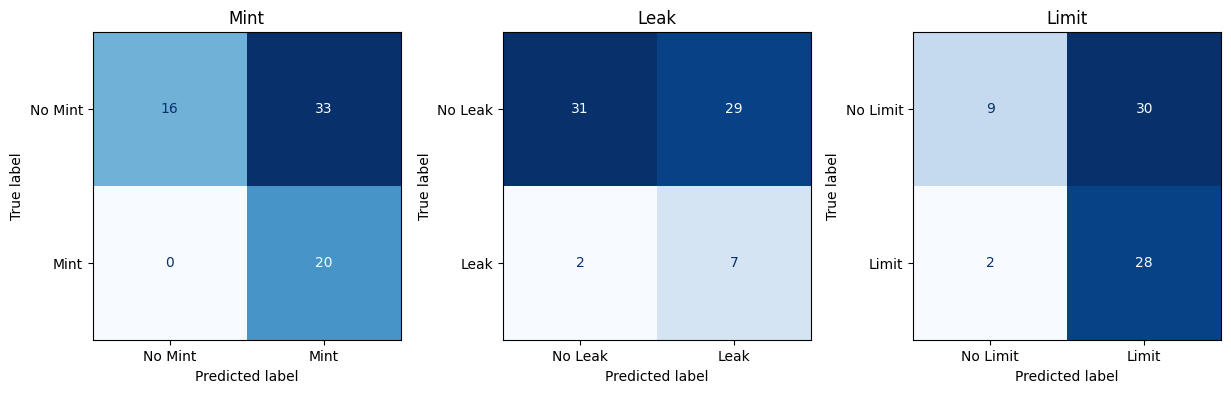

In [5]:
y_pred = model.predict(X_test)
y_pred = (y_pred > thresholds).astype(int)
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [6]:
import tensorflow as  tf
import json

In [7]:
model = tf.keras.models.load_model(os.path.join(MODEL_PATH, 'gru_txn_model.keras'))
extension = json.load(open(os.path.join(MODEL_PATH, 'gru_txn_extension.json')))

In [8]:
extension['thresholds']

[0.49, 0.49, 0.45]

In [9]:
extension['weights']

[0.547945205479452, 0.3111111111111111, 0.6363636363636364]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step
              precision    recall  f1-score   support

        Mint       0.38      1.00      0.55        20
        Leak       0.19      0.78      0.31         9
       Limit       0.48      0.93      0.64        30

   micro avg       0.37      0.93      0.53        59
   macro avg       0.35      0.90      0.50        59
weighted avg       0.40      0.93      0.56        59
 samples avg       0.35      0.57      0.41        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

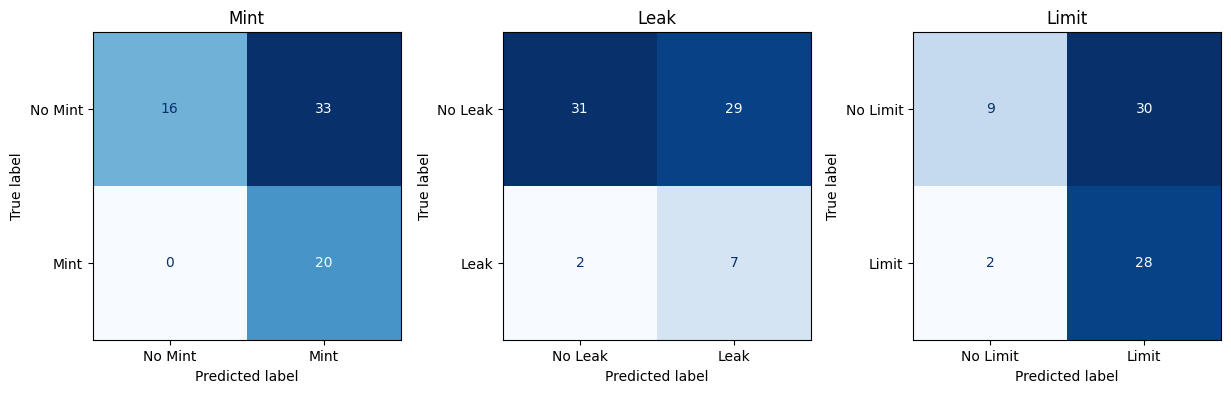

In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > extension['thresholds']).astype(int)
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))